<div align='center' ><font size=6>紫外-可见光谱仪 实验数据分析</font></div>

<center>18377087 181911班 蔡晓亿</center>

## 分光光度计测量罗丹明-B溶液的浓度

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
from scipy import constants
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
standard=pd.read_csv('罗丹明B-10mgL.csv',usecols=[0,1])
A=pd.read_csv('罗丹明B-A组.csv',usecols=[0,1])
B=pd.read_csv('罗丹明B-B组.csv',usecols=[0,1])
C=pd.read_csv('罗丹明B-C组.csv',usecols=[0,1])
D=pd.read_csv('罗丹明B-D组.csv',usecols=[0,1])
data_lis=[standard,A,B,C,D]
name_lis=['10mg/L','A组','B组','C组','D组']
color=['r','y','c','g','b']

根据Lambert-Beer定律：
$$
A=\lg{\frac{I_0}{I}}=\varepsilon bC
$$
所以对于同一溶液A和c成正比，则对于不同溶液，其吸光度A之比即为浓度C之比，对于实验数据进行拟合，根据拟合结果可得 

|组别|浓度C(mg/L)|拟合不确信度$R^2$|
|:-|:-|:-|
|A组|4.46|1.376586E-04|
|B组|9.46|5.574448E-05|
|C组|1.37|4.354544E-06|
|D组|0.662|5.535895E-06|

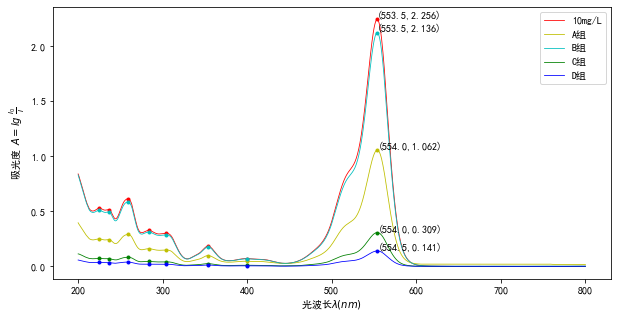

In [8]:
peaks_lis=[]
plt.figure(figsize=[10,5])
plt.xlabel(r'光波长$\lambda(nm)$')
plt.ylabel(r'吸光度 $A=lg\ {\frac{I_0}{I}}$')
xy=standard.values.T
x=xy[0]
y=signal.savgol_filter(xy[1],53,10)
peaks=signal.find_peaks(y,prominence=0.002)
for i in range(5):
    xy=data_lis[i].values.T
    x=xy[0]
    y=signal.savgol_filter(xy[1],53,10)
    peaks_x=[x[i] for i in peaks[0]]
    peaks_y=[y[i] for i in peaks[0]]
    max_point=max(xy.T,key=lambda a:a[1])
    plt.plot(peaks_x,peaks_y,'.',color=color[i])
    plt.plot(x,y,label=name_lis[i],linewidth=0.8,color=color[i])
    plt.text(*max_point,s='('+str(max_point[0])+','+str(max_point[1])+')')
plt.legend()
plt.show()

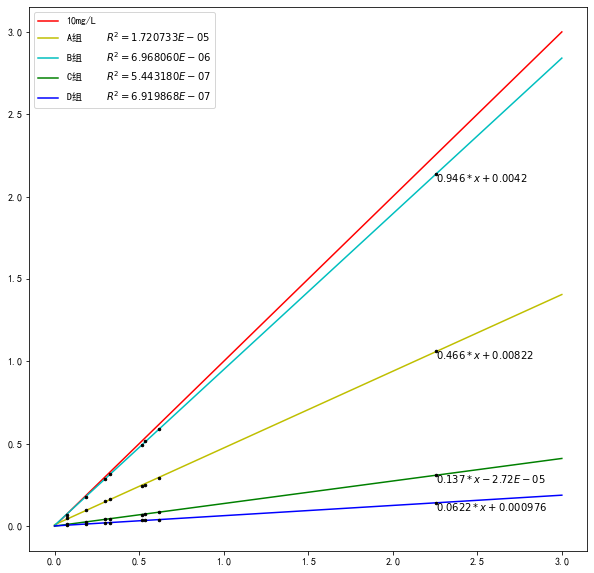

In [9]:
plt.figure(figsize=[10,10])
result=[]
plt.plot(np.linspace(0,3,100),np.linspace(0,3,100),label=name_lis[0],color=color[0])
for i in range(1,5):
    y_1=[data_lis[i].values.T[1][j] for j in peaks[0]]
    y_0=[data_lis[0].values.T[1][j] for j in peaks[0]]
    fit=np.polyfit(y_0,y_1,1)
    result.append(fit)
    res=np.poly1d(fit)
    r2=sum((res(y_0)-y_1)**2)/len(y_1)
    plt.plot(np.linspace(0,3,100),res(np.linspace(0,3,100)),label=name_lis[i]+' '*5+'$R^2='+'%E'%r2+'$',color=color[i])
    plt.text(max(y_0),max(y_1)-0.05,'$%.3G'%fit[0]+('*x+' if fit[1]>0 else '*x')+'%.3G'%fit[1]+'$')
    plt.plot(y_0,y_1,'.',color='k',markersize=5)
plt.legend()
plt.show()

## 分光光度计测量半导体禁带宽度

In [10]:
TiO2=pd.read_csv('TiO2.csv',usecols=[0,1])
WO3=pd.read_csv('WO3.csv',usecols=[0,1])
BiVO4=pd.read_csv('BiVO4.csv',usecols=[0,1])
data_lis_2=[TiO2,WO3,BiVO4]
name_lis_2=['TiO_2','WO_3','BiVO_4']

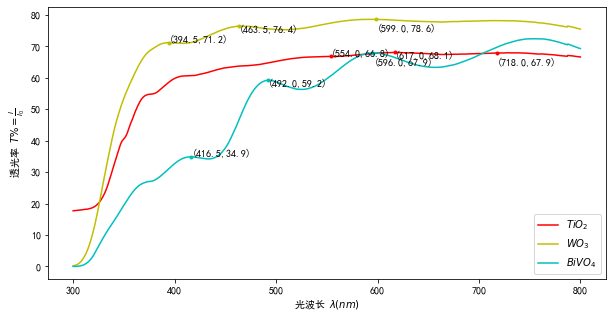

In [11]:
plt.figure(figsize=[10,5])
plt.xlabel(r'光波长 $\lambda(nm)$')
plt.ylabel(r'透光率 $T\%=\frac{I}{I_0}$')
result={}
for i in range(3):
    xy=data_lis_2[i].values.T
    x=xy[0]
    y=signal.savgol_filter(xy[1],53,10)
    peaks=signal.find_peaks(y,prominence=0.05,height=30)
    peaks_x=[x[i] for i in peaks[0]][-1:-4:-1]
    peaks_y=[y[i] for i in peaks[0]][-1:-4:-1]
    result[name_lis_2[i]]=peaks_x
    plt.plot(peaks_x,peaks_y,'.',color=color[i])
    plt.plot(x,y,color=color[i],label='$%s$'%name_lis_2[i])
    for i in range(len(peaks_x)):
        plt.text(peaks_x[i],peaks_y[i]-i*2,s='(%.1f,%.1f)'%(peaks_x[i],peaks_y[i]))
plt.legend(loc=4)
plt.show()

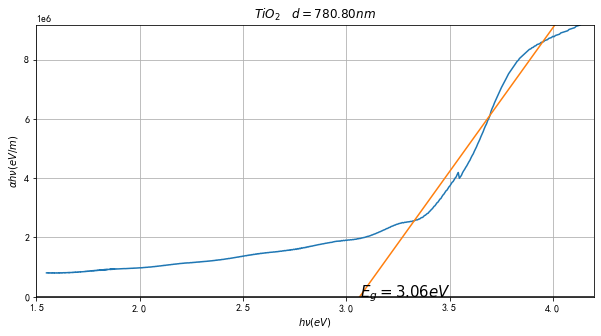

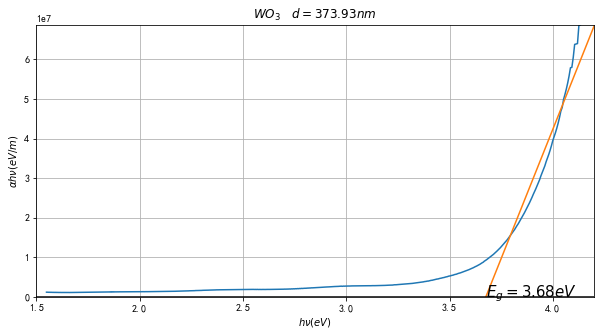

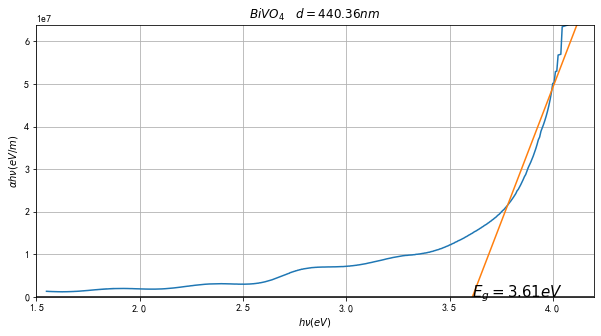

In [12]:
adjust_lis=[
    lambda x:np.logical_and(3.2<=x,x<=3.9),
    lambda x:3.7<=x,
    lambda x:3.7<=x
]
for i in range(3):
    plt.figure(figsize=[10,5])
    xy=data_lis_2[i].values.T
    x=xy[0]
    y=signal.savgol_filter(xy[1],53,10)
    peaks=signal.find_peaks(y,prominence=0.05,height=30)
    peaks_x=[x[i] for i in peaks[0]]
    lambda1,lambda2,lambda3=peaks_x[-1:-4:-1]
    d1=lambda1*lambda2/(2*np.pi*(lambda2-lambda1))
    d2=lambda2*lambda3/(2*np.pi*(lambda3-lambda2))
    d_avg=np.average([d1,d2])
    plt.title('$%s\ \ \ d=%.2fnm$'%(name_lis_2[i],d_avg))
    a_i=-np.log(xy[1]/100)*1e9/d_avg
    y=a_i*constants.h*constants.c/x/1e-9/constants.eV
    x=constants.h*constants.c/x/1e-9/constants.eV
    x=np.delete(x,np.where(y==np.inf))
    y=np.delete(y,np.where(y==np.inf))
    plt.plot(x,y)
    xi=x[np.where(adjust_lis[i](x))]
    yi=y[np.where(adjust_lis[i](x))]
    fit_eg=np.polyfit(xi,yi,1)
    line=np.poly1d(fit_eg)
    xf=np.linspace(1,4.3,100)
    yf=np.polyval(fit_eg,xf)
    plt.plot(xf,yf)
    plt.plot(np.linspace(1,5,500),[0]*500,color='k')
    plt.xlim(1.5,4.2)
    plt.ylim(0,np.max(y))
    plt.xlabel(r'$h\nu(eV)$')
    plt.ylabel(r'$\alpha h\nu(eV/m)$')
    plt.text(line.roots,0.001,s='$E_g=%.2feV$'%line.roots[0],fontdict={'size':15})
    plt.grid()
plt.show()

当薄膜是单层膜时，垂直入射的情况下，透射率为[<sup>[1]</sup>](#refer-anchor-1)：
$$
T=\frac{n_2}{n_0}\frac{t^2}{1+r^2-2r\cos{\frac{4\pi n_1d_1}{\lambda}}}
$$
则透过的光强度为薄膜厚度$n_1d_1$的函数，当$n_1d_1$等于$\frac\lambda4$的倍数时，透射率会出现极值。
如果薄膜的厚度较厚，薄膜的几何厚度可以从两个相邻的极值波长来求得。假设$\lambda_1$和$\lambda_2$是两个相邻的极值波长$(\lambda_1>\lambda_2)$，由$nd=\frac{(2m+1)\lambda_1}4=\frac{[2(m+1)+1]\lambda_2}4$可以得到
$$
d=\frac{\lambda_1\lambda_2}{2\pi(\lambda_1-\lambda_2)}
$$
取两组相邻的极值取平均值得到薄膜厚度。
根据公式
$$
\alpha_i=\frac{-\ln{T_i}}{d}
$$
$$
\alpha h\nu=A(h\nu-E_g)^{\frac m2}
$$
根据$\alpha h \nu\varpropto h\nu$的函数关系作图，将吸收边陡峭的线性部分外推到$(\alpha h \nu)^2=0$处，与x轴的交点即为相应的禁带宽度值。

|半导体物质|$d(nm)$|$E_g(eV)$|
|:----|:---|:---|
|$TiO_2$|780.80|3.06|
|$WO_3$|373.93|3.68|
|$BiVO_4$|440.36|3.61|

在上述计算中，因为$TiO_2$的函数图像波动并不明显，所以极值的寻找不够准确，导致最后的光学厚度d误差较大，但这不影响$E_g$的计算，对于陡峭部分的外推与x轴的交点不随d的变化而改变。

## 参考文献

<div id="refer-anchor-1"></div>- [1]张慧萍. 光学薄膜厚度及性能的测试[D].南京理工大学,2013.
